# Bode plots

## Instructions
First run the the first cell with the imports!!!

In [26]:
%matplotlib inline
import sys
from Tkinter import *
import matplotlib
matplotlib.use("TkAgg")

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2TkAgg

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from math import floor

##Create Easy Bode Plots

In [3]:
method = raw_input('Which method for defining your system? For numerator/denominator, type numden. For zeros and poles, type zp. For State space model, type ss');
if method == "numden":
    num = eval(raw_input("Give the numerator as a list of coefficients. For example for s^2 + 2s + 3, input [1, 2, 3]"))
    den = eval(raw_input("Give the denominator as a list of coefficients."))
    s1 = signal.lti(num, den)
elif method == "zp":
    z = eval(raw_input("Give a list of zeros"))
    p = eval(raw_input("Give a list of poles"))
    K = eval(raw_input("Give a gain. (Notice that H(s) = K*(s-n1)*(s-n2).../(s-p1)*(s-p2)...)"))
    s1 = signal.lti(z, p, K)
elif method == "ss":
    A = eval(raw_input("Input the A-matrix. Remember a matrix is a list of lists. For exameple I2 = [[1, 0],[0, 1]]"))
    B = eval(raw_input("Input the B-matrix."))
    C = eval(raw_input("Input the C-matrix."))
    D = eval(raw_input("Input the D-matrix."))
    s1 = signal.lti(A, B, C, D)


Which method for defining your system? For numerator/denominator, type numden. For zeros and poles, type zp. For State space model, type ssnumden
Give the numerator as a list of coefficients. For example for s^2 + 2s + 3, input [1, 2, 3][1,1]
Give the denominator as a list of coefficients.[1,-3]


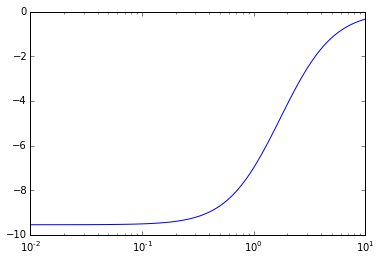

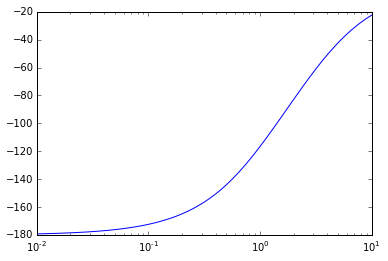

In [4]:
w, mag, phase = s1.bode()

%matplotlib inline
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

## Demos of how to draw a bode plot by hand
First split it up in the break points representation.

##Relation between sinusoidal input/output

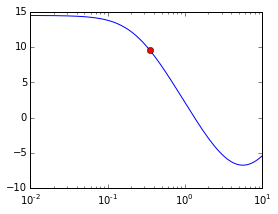

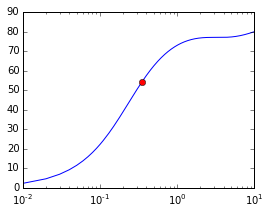

In [ ]:

def mclose():
    mGui.destroy() 
    
def Hstring(num,den):
    
    result = "H(s) = ("
    if num[0] < 0:
        result += "-"
    for i in range(len(num)):
        plusminus = " + "
        if i== len(num)-1 or num[i+1] < 0:
            plusminus = " - "
            
        if (len(num) - i-1) > 1:
            result += str(abs(num[i])) + "s^" + str(len(num)-1) + plusminus
        elif (len(num) - i-1) == 1:
            result += str(abs(num[i])) + "s" + plusminus
        elif (len(num) - i-1) == 0:
            result += str(abs(num[i])) + ")"
            
    result += " / ("
    if den[0] < 0:
        result += "-"
        
    for i in range(len(den)):
        plusminus = " + "
        if i== len(den)-1 or den[i+1] < 0:
            plusminus = " - "
        
        if (len(den) - i-1) > 1:
            result += str(abs(den[i])) + "s^" + str(len(den)-1) + plusminus
        elif (len(den) - i-1) == 1:
            result += str(abs(den[i])) + "s" + plusminus
        elif (len(den) - i-1) == 0:
            result += str(abs(den[i])) + ")"
            
    return result
    
def H(num,den,s):
    numresult = 0
    denresult = 0
    for i in range(len(num)):
        numresult += num[-i-1]*s**i
    
    for i in range(len(den)):
        denresult += den[-i-1]*s**i
    
    return numresult/denresult

    
        
def minput():
    
    mynum= eval(num.get())
    myden = eval(den.get())
    
    Amp = A.get()
    omega = w.get()
    fig = plt.figure()
    axes = fig.add_subplot(111)
    x1 = np.linspace(0,8*np.pi/omega,1000)
    y1 = Amp*np.sin(omega*x1)
    
    Hw = H(mynum,myden,omega*1j)
    ang = np.angle(Hw)
    mag = abs(Hw)
    y2 = Amp*mag*np.sin(omega*x1+ang)
    line1 = axes.plot(x1,y1,label="input")
    line2 = axes.plot(x1,y2,label="output")
    axes.set_autoscaley_on(False)
    axes.set_xlim([0,8*np.pi/omega])
    
    plt.legend()
    
    canvas = FigureCanvasTkAgg(fig,mGui)
    canvas.show()
    canvas.get_tk_widget().place(x = 10, y = 270)
    
    
    fig = plt.figure(figsize=(4,3))
    axes = fig.add_subplot(111)
    s1 = signal.lti(mynum, myden)
    w1 = np.linspace(10**(floor(np.log10(omega)-1)),10**floor(np.log10(omega)+2),1000)
    w1, mag, phase = s1.bode(w = w1)
    
    for k in range(len(phase)):
        phase[k] = (phase[k]+ 180)%360 - 180
    axes.semilogx(w1, mag)
    axes.plot(omega,20*np.log10(abs(Hw)),'ro')
    canvas = FigureCanvasTkAgg(fig,mGui)
    canvas.show()
    canvas.get_tk_widget().place(x = 500, y = 100)
    
    fig = plt.figure(figsize=(4,3))
    axes = fig.add_subplot(111)
    
    axes.semilogx(w1, phase)
    axes.plot(omega,np.angle(Hw,deg = 1),'ro')
    canvas = FigureCanvasTkAgg(fig,mGui)
    canvas.show()
    canvas.get_tk_widget().place(x = 500, y = 370)
    
    mlabelex1 = Label(mGui,text = "At w = " + str(omega) + " rad/s is:").place(x = 830,y = 290)
    mlabelex2 = Label(mGui,text = "Magnitude = " + str(round(20*np.log10(abs(Hw)),2)) + " dB (which is " + str(round(abs(Hw),2)) + ")").place(x = 830,y = 310)
    mlabelex3 = Label(mGui,text = "Phase = " + str(round(ang*180/np.pi,2)) + " degrees").place(x = 830, y = 330)
    mlabelex4 = Label(mGui,text = Hstring(mynum,myden)).place(x = 350, y = 70)
    plusminus = " + "
    if ang < 0:
        plusminus = " - "
    mlabelex5 = Label(mGui,text = "Output signal = " + str(round(abs(Hw)*Amp,2)) + "sin(" + str(omega) + "t" + plusminus + \
                      str(round(abs(ang),2)) + ")").place(x=10,y=250)
    
mGui = Tk()
A = DoubleVar()
w = DoubleVar()
num = StringVar()
den = StringVar()

mGui.geometry('1200x650+100+50')
mGui.title("Relation between sinusoidal input/output")

mlabel0 = Label(mGui, text = "First give the numerator and denominator of the transfer function of your system as lists.\
Then give the parameters of your input signal and click OK. Afterwards you can put in other values and basically play around.")\
.place(x=10,y = 10)
mlabel1 = Label(mGui,text = "Input signal u(t) = Asin(wt)").place(x = 10,y = 130)
mlabel2 = Label(mGui,text = "A").place(x = 10,y = 160)
mlabel3 = Label(mGui,text = "w").place(x = 10,y = 190)

mentryA = Entry(mGui, textvariable = A).place(x = 30, y = 160)
mentryw = Entry(mGui, textvariable = w).place(x = 30, y = 190)


mbutton1 = Button(mGui,text = "OK",command = minput).place(x = 10, y = 220)

mlabel4 = Label(mGui,text = "Transfer function H(s). Give the numerator and denominator as lists. Example: s^2 + 2s + 3 = [1,2,3]\
").place(x = 250,y = 40)
mnum = Entry(mGui, textvariable = num).place(x = 300, y = 110)
mden = Entry(mGui, textvariable = den).place(x = 300, y= 140)




mbuttonClose = Button(mGui, text= "Finish", command = mclose).place(x = 1100, y = 600)

mGui.mainloop()